Problem Statement 1:
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.

Dataset Information:
The walmart.csv contains 6435 rows and 8 columns.

Feature Name Description
Store Store number
Date Week of Sales
Weekly_Sales Sales for the given store in that week
Holiday_Flag If it is a holiday week
Temperature Temperature on the day of the sale
Fuel_Price Cost of the fuel in the region
CPI Consumer Price Index
Unemployment Unemployment Rate

1. You are provided with the weekly sales data for their various outlets. Use statistical
analysis, EDA, outlier analysis, and handle the missing values to come up with various
insights that can give them a clear perspective on the following:
a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?
b. If the weekly sales show a seasonal trend, when and what could be the reason?
c. Does temperature affect the weekly sales in any manner?
d. How is the Consumer Price index affecting the weekly sales of various stores?
e. Top performing stores according to the historical data.
f. The worst performing store, and how significant is the difference between the
highest and lowest performing stores.
2. Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks.

In [5]:
import seaborn as sns
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [6]:
# import the regressors
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

# import metrics
from sklearn.metrics import mean_squared_error

In [7]:


df = pd.read_csv("Walmart.csv")

In [8]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [9]:
df.tail(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6425,45,24-08-2012,718232.26,0,72.62,3.834,191.344887,8.684
6426,45,31-08-2012,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,07-09-2012,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,14-09-2012,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,21-09-2012,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [10]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [12]:
df.shape

(6435, 8)

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
# Fixing the data-type as date has object Dtype ,hence changing it to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [16]:
# Checking the duplicate values

df[df.duplicated()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [17]:
# Fixing ouliers

def find_outlier_rows(df, col, level='both'):
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    
    lower_bound = df[col].quantile(0.25) - 1.5 * iqr
    upper_bound = df[col].quantile(0.75) + 1.5 * iqr

    if level == 'lower':
        return df[df[col] < lower_bound]
    elif level == 'upper':
        return df[df[col] > upper_bound]
    else:
        return df[(df[col] > upper_bound) | (df[col] < lower_bound)]

In [18]:
def count_outliers(df):
    df_numeric = df.select_dtypes(include=['int', 'float'])

    columns = df_numeric.columns

    outlier_cols = [col for col in columns if len(find_outlier_rows(df_numeric, col)) != 0]
    
    outliers_df = pd.DataFrame(columns=['outlier_counts', 'outlier_percent'])

    for col in outlier_cols:
        outlier_count = len(find_outlier_rows(df_numeric, col))
        all_entries = len(df[col])
        outlier_percent = round(outlier_count * 100 / all_entries, 2)

        outliers_df.loc[col] = [outlier_count, outlier_percent]

    return outliers_df

In [19]:
# Count the columns in dataframe for outliers

count_outliers(df).sort_values('outlier_counts', ascending=False)

,outlier_counts,outlier_percent
Unemployment,481.0,7.47
Holiday_Flag,450.0,6.99
Weekly_Sales,34.0,0.53
Temperature,3.0,0.05


The above dataframe shows that weekly_sales, holiday_flag, temperature and unemployment columns all have outliers with unemployment having the largest outlier percentage, 7%. Let’s examine the outliers in each column to decide on how to handle them.

In [20]:
find_outlier_rows(df, 'Unemployment')['Unemployment'].describe()


count    481.000000
mean      11.447480
std        3.891387
min        3.879000
25%       11.627000
50%       13.503000
75%       14.021000
max       14.313000
Name: Unemployment, dtype: float64

The minimum and maximum values of these outliers are 3.89% and 14.31% respectively. Majority, greater or equal to 75%, are more than or equal to 11.6% These values are obtainable in reality and will be left intact for the analysis. Thus, median, which rubust to outliers, will be used to measure the centre of the unemployment rate distribution.

In [21]:
find_outlier_rows(df, 'Holiday_Flag')['Holiday_Flag'].describe()

count    450.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Holiday_Flag, dtype: float64

We can see that all special holiday weeks form the outliers. This is as a result of the fact that most of the weeks, 93%, are non-special holiday weeks. This will also be left intact.

In [22]:
find_outlier_rows(df, 'Weekly_Sales') 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
189,2,2010-12-24,3436007.68,0,49.97,2.886,211.064660,8.163
241,2,2011-12-23,3224369.80,0,46.66,3.112,218.999550,7.441
471,4,2010-11-26,2789469.45,1,48.08,2.752,126.669267,7.127
474,4,2010-12-17,2740057.14,0,46.57,2.884,126.879484,7.127
475,4,2010-12-24,3526713.39,0,43.21,2.887,126.983581,7.127
523,4,2011-11-25,3004702.33,1,47.96,3.225,129.836400,5.143
526,4,2011-12-16,2771397.17,0,36.44,3.149,129.898065,5.143
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143
761,6,2010-12-24,2727575.18,0,55.07,2.886,212.916508,7.007
1329,10,2010-11-26,2939946.38,1,55.33,3.162,126.669267,9.003


We can note that all the weekly_sales outliers occur either in November or December with one outlier of the outliers that occur in October.

Does the dataset require any feature engineering to better support the analysis goals?¶
Employment rate may be correlated with weekly sales. This will be created from the unemployment rate. Also the date column will be split into three so that we can analyse the data by year, month or day.

In [23]:
df['Employment'] = 100 - df['Unemployment']

In [24]:
df.sample(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Employment
3013,22,2010-04-16,1000968.67,0,51.14,2.885,135.827250,8.348,91.652
6153,44,2010-05-03,284617.27,0,40.65,2.681,126.578286,8.119,91.881
4550,32,2012-04-05,1187384.53,0,58.29,3.903,197.606353,8.090,91.910


In [25]:
# split the date column
df['Year']= df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Employment,Year,Month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,91.894,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,91.894,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,91.894,2010,2,19


Exploratory Data Analysis

In [26]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Employment,Year,Month,Day
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,92.000849,2010.965035,6.475524,15.650350
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.875885,0.797019,3.321797,8.753908
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,85.687000,2010.000000,1.000000,1.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,91.378000,2010.000000,4.000000,8.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,92.126000,2011.000000,6.000000,16.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,93.109000,2012.000000,9.000000,23.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,96.121000,2012.000000,12.000000,31.000000


Analyzing Distribution

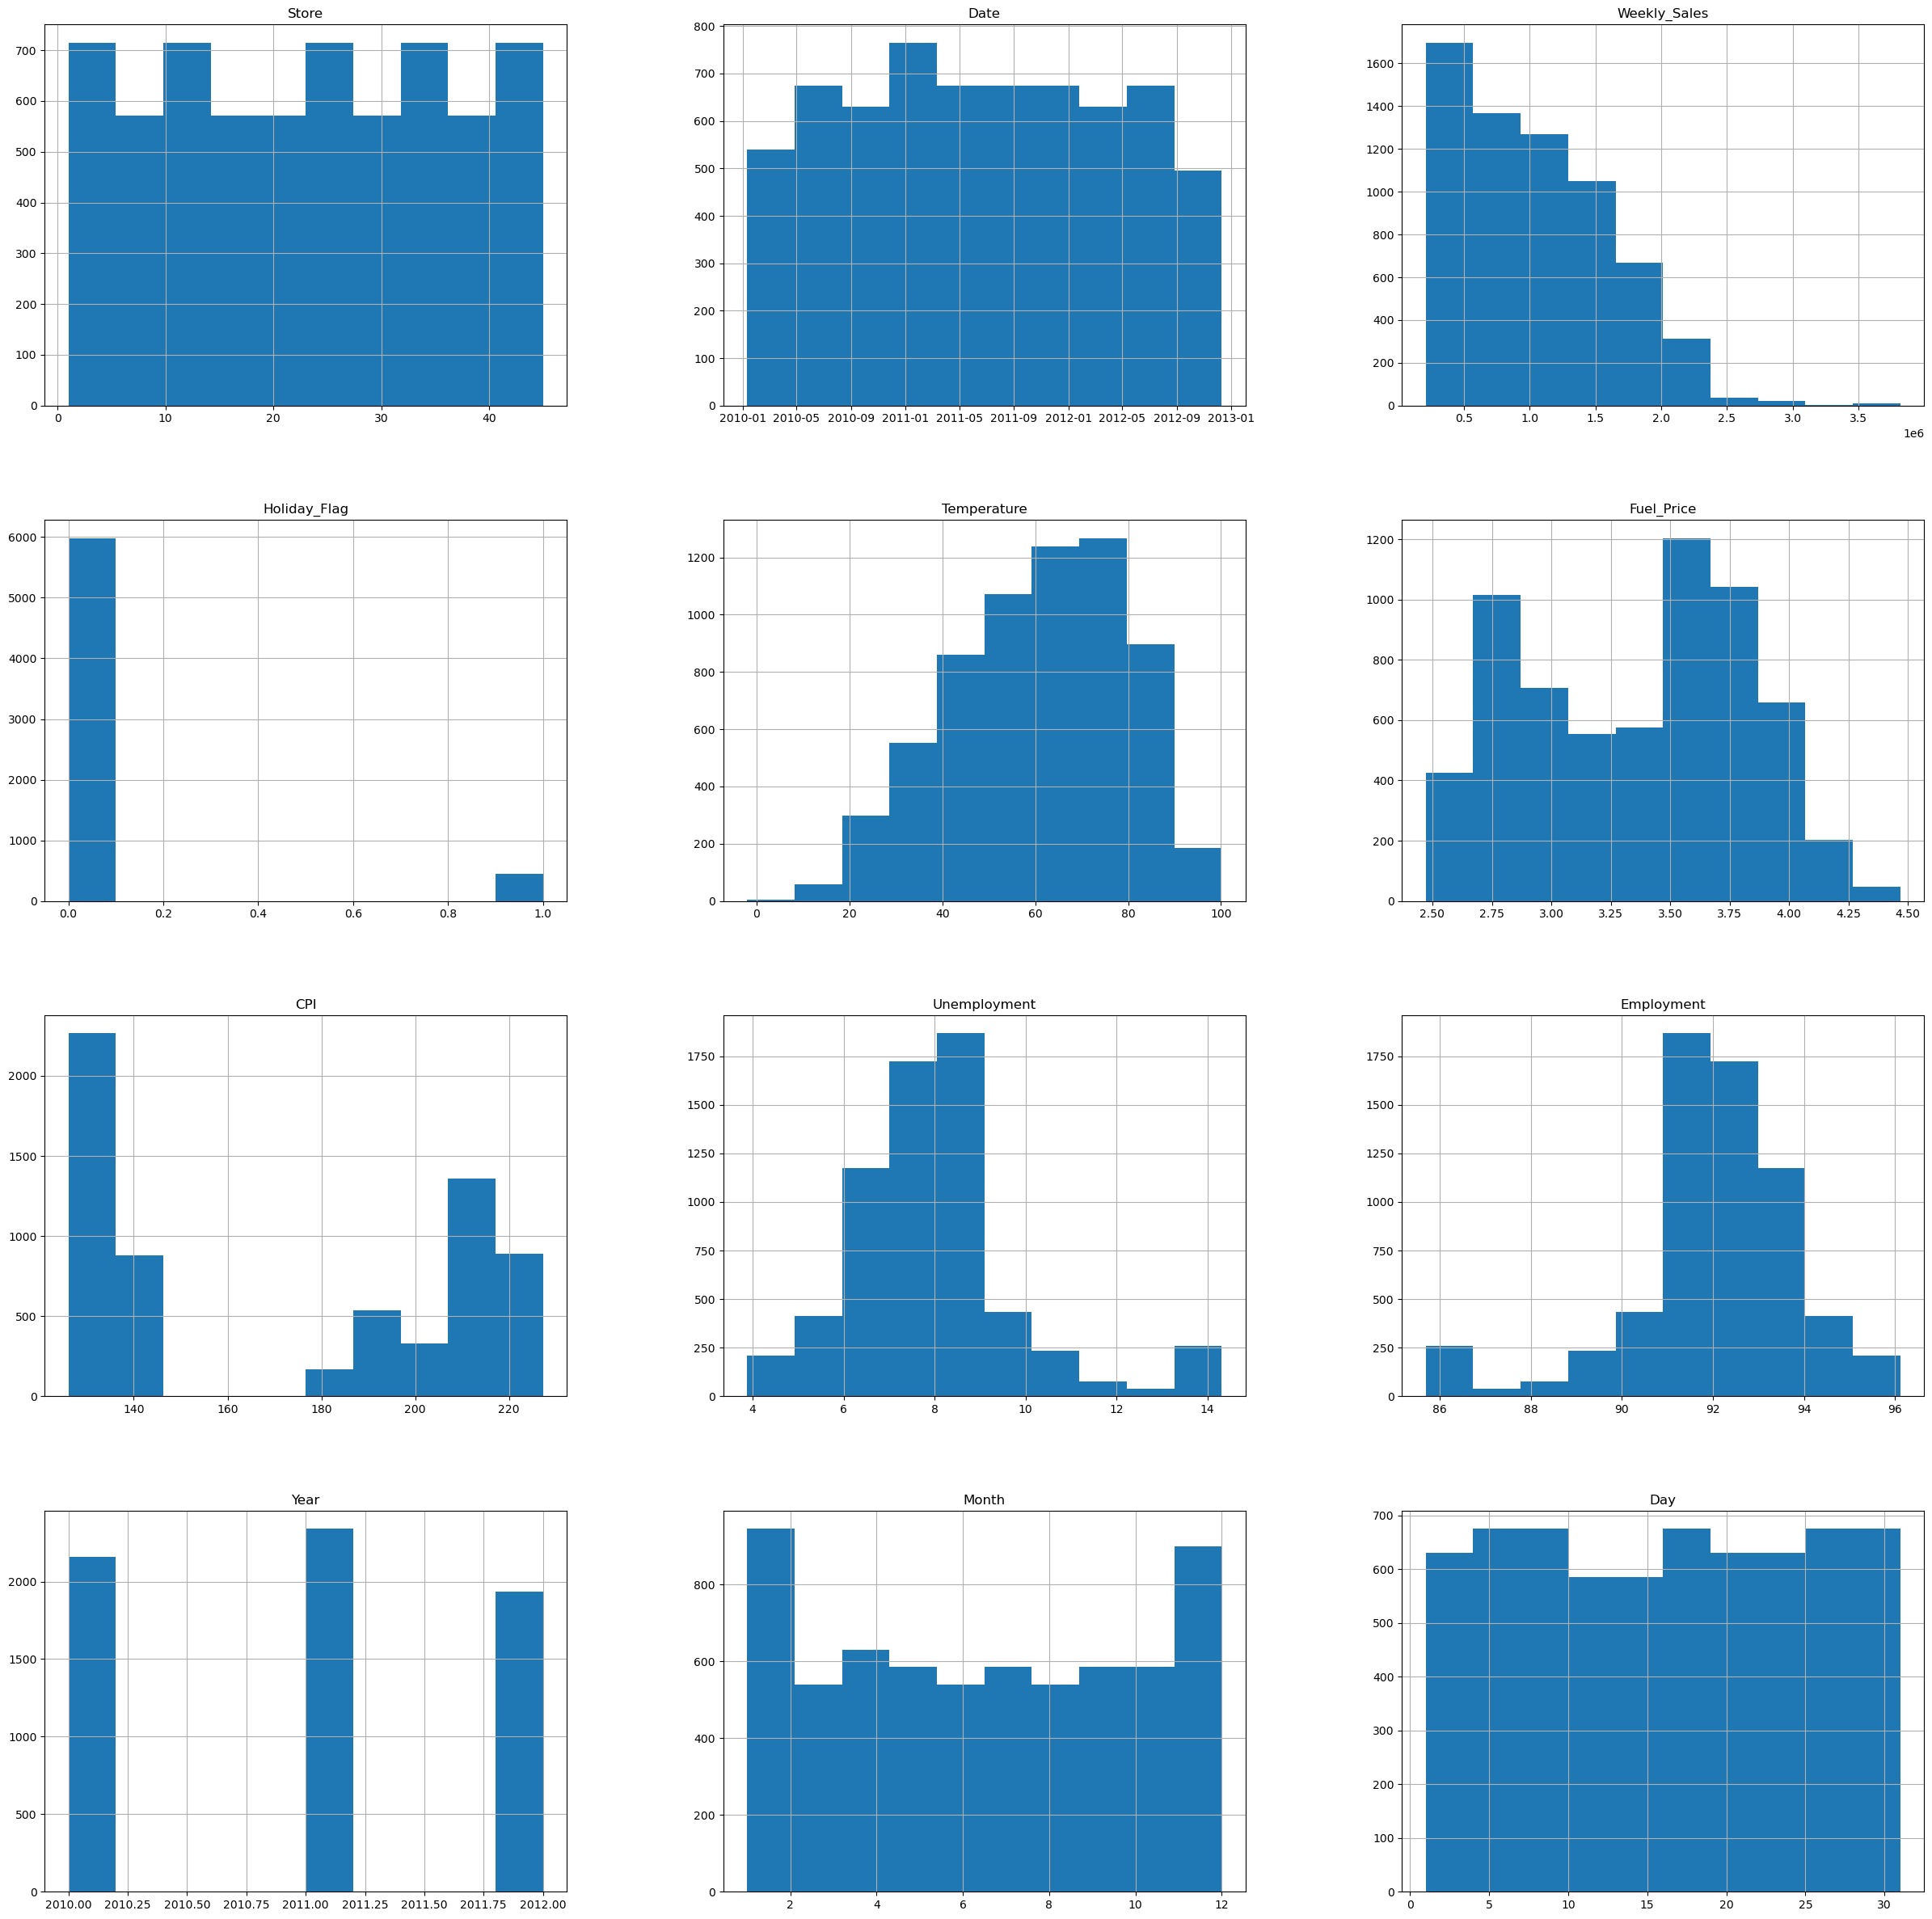

In [27]:
df.hist(figsize=(30,30))
plt.show()

From the above histograms, we can understand that:

The number of transactions occurred almost evenly across various stores and years.
The distribution of weekly_sales right-skewed. Only a few of the weekly sales are above 2 million USD.
The distribution of temperature is approximately normal.
The distribution of fuel_price is bi-modal.
CPI formed two clusters.
Unemployment rate is near normally distributed.
Four consecutive months November-February recorded the highest sales.

What is the overall trend in sales over time?

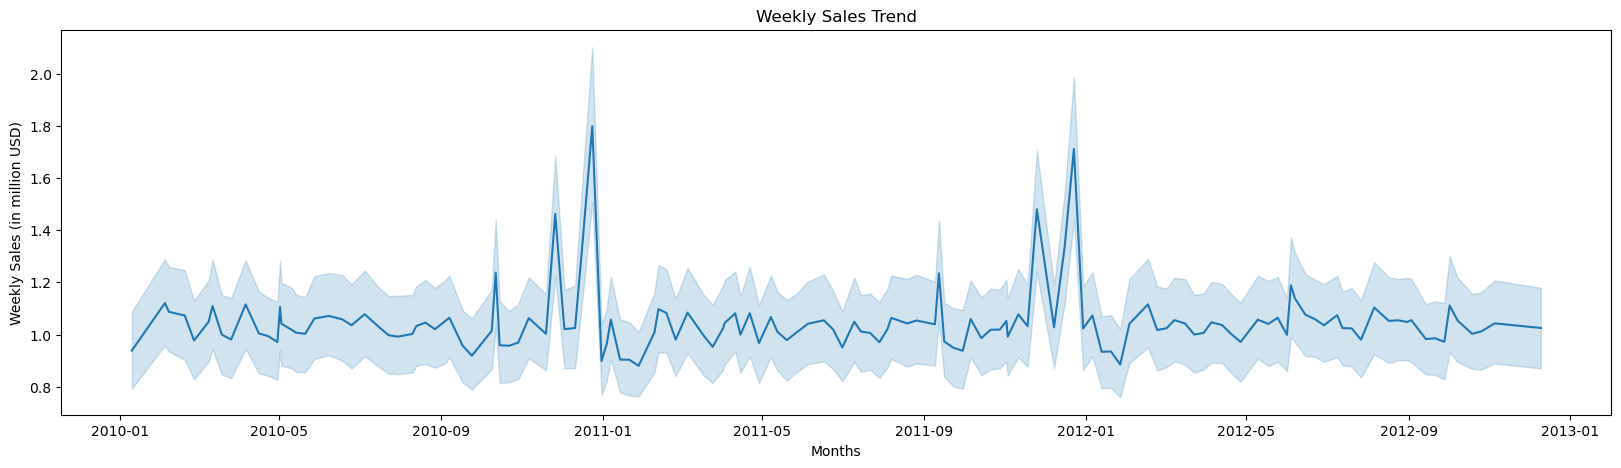

In [28]:
plt.figure(figsize=(20,5))

sns.lineplot(x=df.Date, y=(df.Weekly_Sales/1e6))

plt.xlabel('Months')
plt.ylabel('Weekly Sales (in million USD)')
plt.title('Weekly Sales Trend')


plt.show()

Are there any seasonality trends in the dataset?

In [29]:
pivot_table = df.pivot_table(index='Month', columns='Year', values='Weekly_Sales')
pivot_table

Year,2010,2011,2012
Month,,,
1,9.386639e+05,9.420697e+05,9.567817e+05
2,1.064372e+06,1.042273e+06,1.057997e+06
3,1.034590e+06,1.011263e+06,1.025510e+06
4,1.021177e+06,1.033220e+06,1.014127e+06
5,1.039303e+06,1.015565e+06,1.053948e+06
6,1.055082e+06,1.038471e+06,1.082920e+06
7,1.023702e+06,9.976049e+05,1.025480e+06
8,1.025212e+06,1.044895e+06,1.064514e+06
9,9.983559e+05,1.026810e+06,9.988663e+05


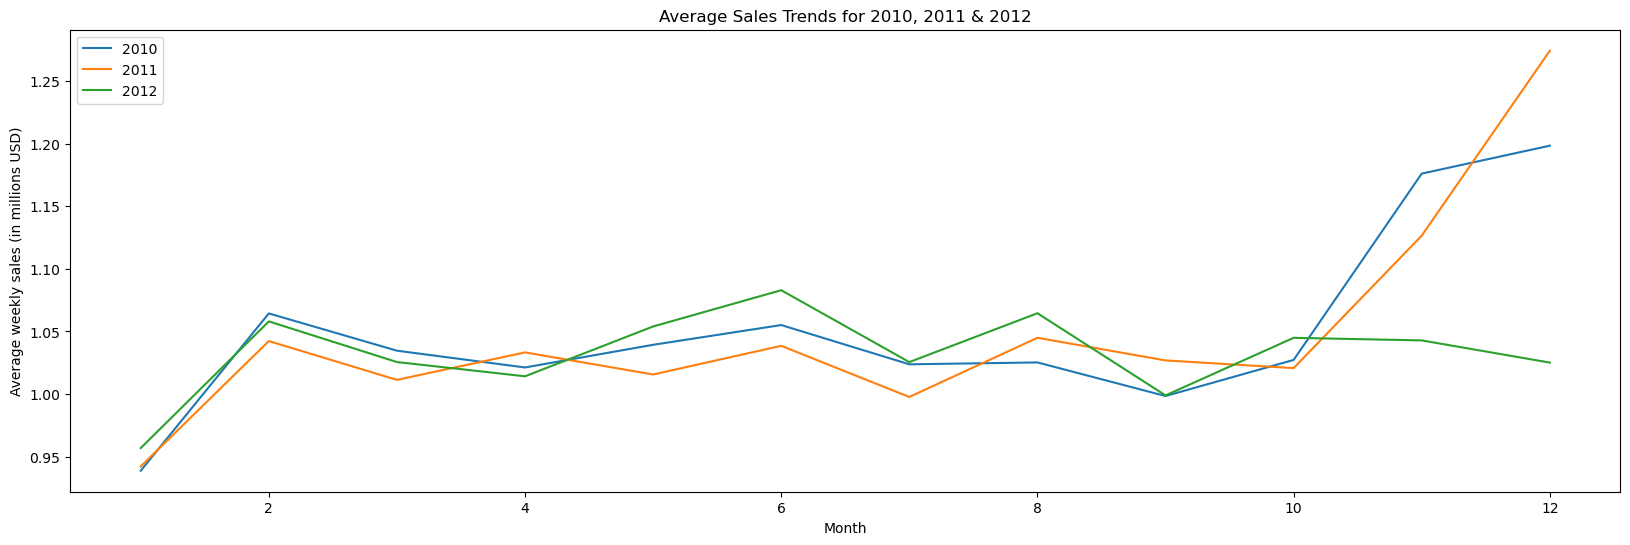

In [30]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x=pivot_table.index, y=pivot_table[2010]/1e6, ax=ax, label='2010')
sns.lineplot( x=pivot_table.index, y=pivot_table[2011]/1e6, ax=ax, label='2011')
sns.lineplot( x=pivot_table.index, y=pivot_table[2012]/1e6, ax=ax, label='2012')

plt.ylabel('Average weekly sales (in millions USD)')
plt.title('Average Sales Trends for 2010, 2011 & 2012')

plt.legend()
plt.show()

Which stores had the highest and lowest average revenues over the years?

In [31]:
sales_store = df.groupby('Store').sum().reset_index()

In [32]:
top_sales_store = sales_store.sort_values('Weekly_Sales',ascending=False).head()[['Store','Weekly_Sales']]
top_sales_store

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


In [33]:
bottom_sales_store = sales_store.sort_values('Weekly_Sales',ascending=True).head()[['Store','Weekly_Sales']]
bottom_sales_store

,Store,Weekly_Sales
32,33,37160221.96
43,44,43293087.84
4,5,45475688.90
35,36,53412214.97
37,38,55159626.42


<Axes: xlabel='Store', ylabel='Weekly_Sales'>

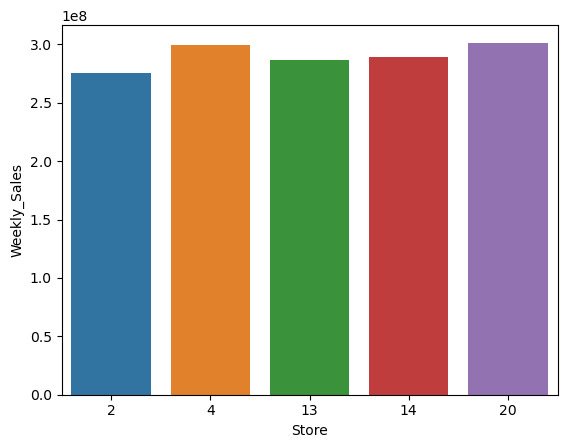

In [34]:
sns.barplot(x='Store',y='Weekly_Sales',data=top_sales_store)

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

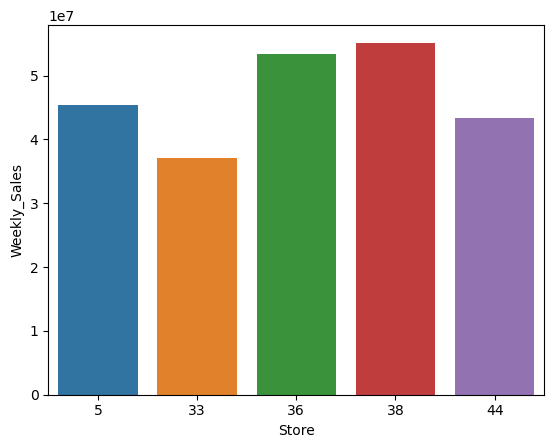

In [35]:
sns.barplot(x='Store',y='Weekly_Sales',data=bottom_sales_store)

How does non-holiday weekly sales compared to holiday weekly sales?

In [36]:
# filter out non-holiday and holiday weekly sales 
non_holiday_sales = df[df['Holiday_Flag'] == 0]
holiday_sales = df[df['Holiday_Flag'] == 1]

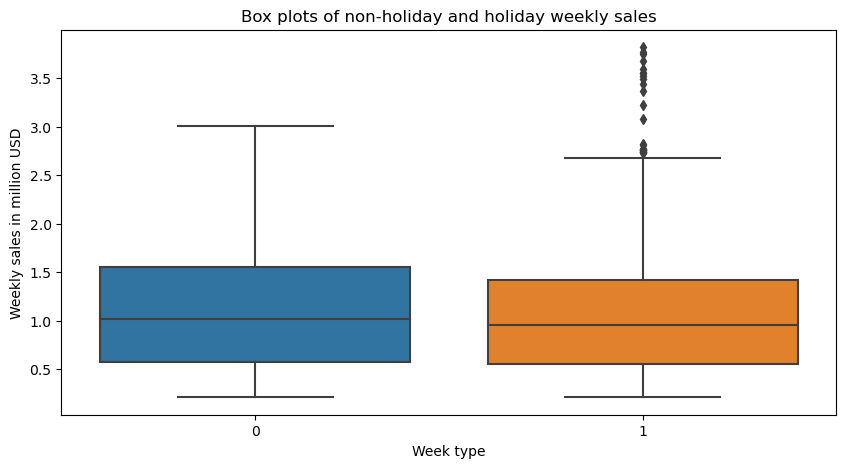

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=[holiday_sales['Weekly_Sales']/1e6, non_holiday_sales['Weekly_Sales']/1e6])
plt.ylabel('Weekly sales in million USD')
plt.xlabel('Week type')
plt.title('Box plots of non-holiday and holiday weekly sales')
plt.show()

We can see that both holiday and non-holiday weekly sales have similar spread. However, the bigger sales happen during the holiday weeks.

In [38]:
Are there correlations between the features of the dataset and weekly_sales?

Object `weekly_sales` not found.


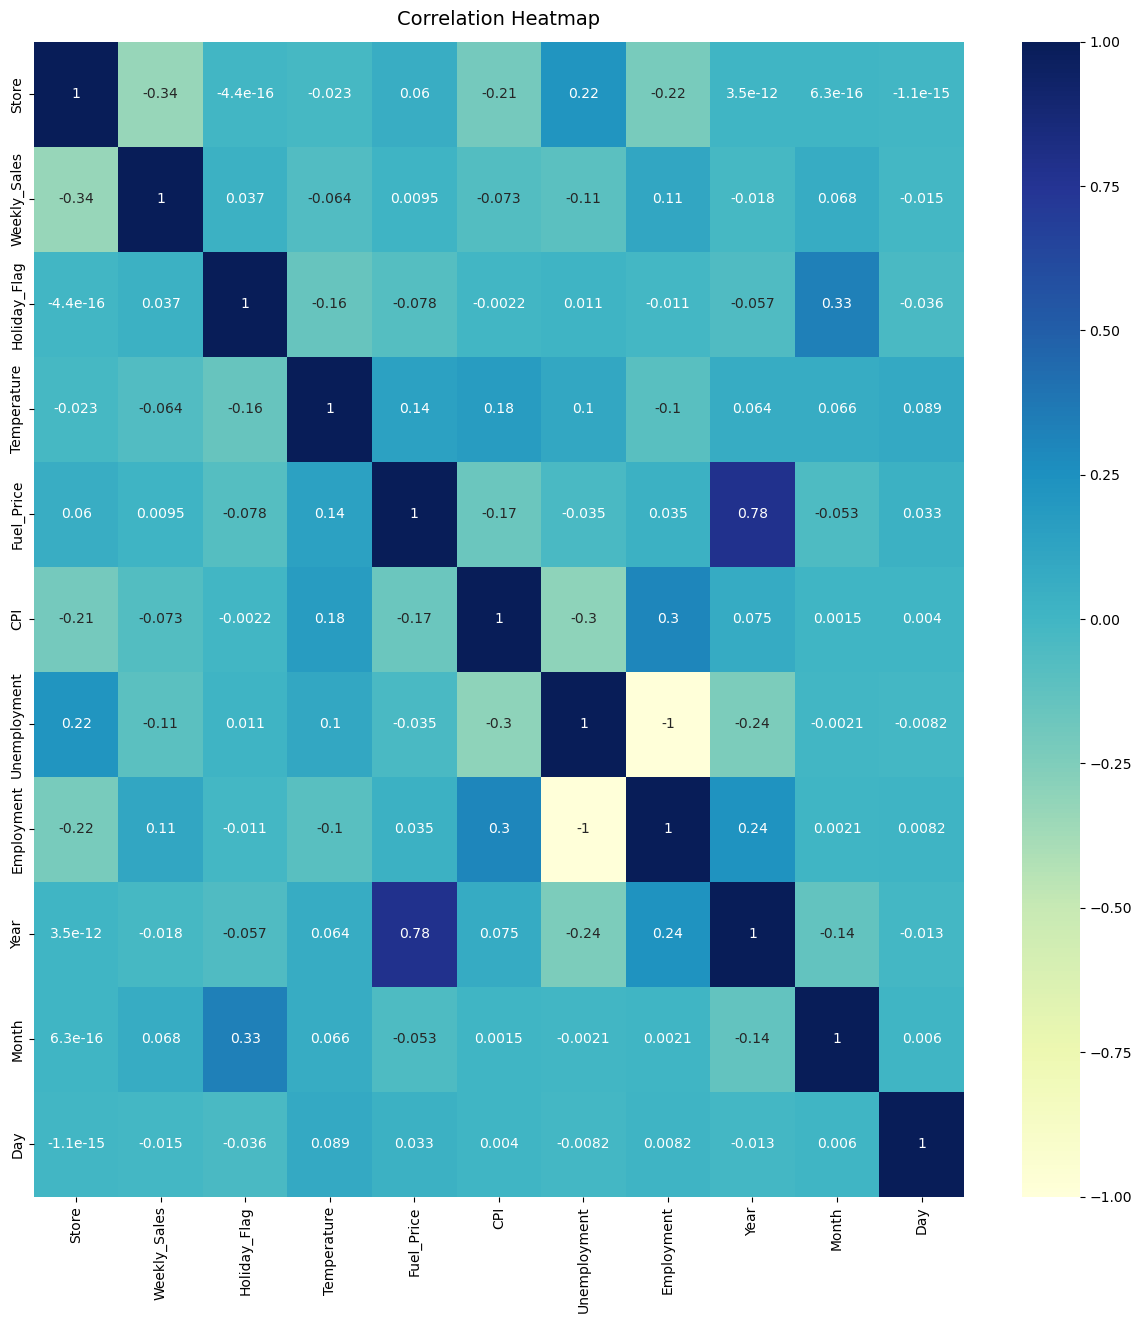

In [39]:
fig, ax = plt.subplots(figsize=(15,15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap ="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Of all the weaker correlations, employment is the strongest with 0.11 correlation coefficient.

Model Building

In [40]:
df_copy = df.copy()

In [41]:
df_copy.drop(['Date', 'Unemployment'], axis=1, inplace=True)
df_copy.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Employment,Year,Month,Day
0,1,1643690.90,0,42.31,2.572,211.096358,91.894,2010,5,2
1,1,1641957.44,1,38.51,2.548,211.242170,91.894,2010,12,2
2,1,1611968.17,0,39.93,2.514,211.289143,91.894,2010,2,19
3,1,1409727.59,0,46.63,2.561,211.319643,91.894,2010,2,26
4,1,1554806.68,0,46.50,2.625,211.350143,91.894,2010,5,3


Separating X and y

In [42]:
X = df_copy.drop('Weekly_Sales', axis=1)
y = df_copy['Weekly_Sales']

Scaling Feature

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Spliting and Testing data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

Model Training

In [46]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return rmse

In [47]:
def evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test):
    rmses = [evaluate_model(regressor, X_train, y_train, X_test, y_test) for regressor in regressors]
    regressor_rmses = dict(zip(regressor_names, rmses))
    df = pd.DataFrame.from_dict(regressor_rmses, orient='index')
    df = df.reset_index()
    df.columns = ['regressor_name', 'rmse']
    return df.sort_values('rmse', ignore_index=True)

In [48]:
linear_regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2)
polynomial_regressor = Pipeline([("polynomial_features", polynomial_features),
("linear_regression", linear_regressor)])
ridge_regressor = Ridge()
lasso_regressor = Lasso()
elastic_net_regressor = ElasticNet()
decision_tree_regressor = DecisionTreeRegressor()
random_forest_regressor = RandomForestRegressor()
boosted_tree_regressor = GradientBoostingRegressor()
neural_network_regressor = MLPRegressor()
support_vector_regressor = SVR()
grad_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, loss='ls')
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='uniform')
spline_regressor = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [49]:
# collect the list of regressors
regressors = [linear_regressor, polynomial_regressor, ridge_regressor, lasso_regressor, elastic_net_regressor, 
              decision_tree_regressor, random_forest_regressor, boosted_tree_regressor, neural_network_regressor, 
              support_vector_regressor, knn_regressor, spline_regressor]

# collect the names of regressors
regressor_names = ["Linear Regression", "Polynomial Regression", "Ridge Regression", "Lasso Regression", 
                   "Elastic Net Regression", "Decision Tree Regression", "Random Forest Regression", 
                   "Boosted Tree Regression", "Neural Network Regression", "Support Vector Regression", 
                   "K-Nearest Neighbour Regression", "Spline Regression"]

In [50]:
print('\033[1m Table of regressors and their RMSEs')
evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test)

 Table of regressors and their RMSEs


,regressor_name,rmse
0,Random Forest Regression,1.151155e+05
1,Decision Tree Regression,1.522266e+05
2,Boosted Tree Regression,1.750082e+05
3,Spline Regression,4.377161e+05
4,K-Nearest Neighbour Regression,4.606521e+05
5,Polynomial Regression,4.786593e+05
6,Ridge Regression,5.209623e+05
7,Lasso Regression,5.209627e+05
8,Linear Regression,5.209628e+05
9,Elastic Net Regression,5.258987e+05


In [51]:
rmse = evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test)

best_rmse = rmse.iloc[0]['rmse']
median_sale = df['Weekly_Sales'].median()
percent_deviation = round((best_rmse*100/median_sale), 2)

# print the result
print('The model has average percentage error of {}%'.format(percent_deviation))

The model has average percentage error of 12.1%



Conclusions:
Our analysis shows that sales during holiday weeks are significantly higher than during non-holiday weeks, with sales doubling on average. Additionally, there is a strong seasonal component to the sales data. The average sales of the top performing stores are up to 500% higher than the lowest performing stores.

The best model for predicting future sales is the Random Forest Regressor model,which achieved an RMSE of 1.17e+05. This is a good estimate as it is 88% close to the median sale of the data.

These findings have important implications for businesses as they can inform decisions about inventory, staffing, and marketing efforts. By understanding the factors that drive sales and using a reliable model to forecast future sales, businesses can better plan for the future and optimize their resources.